# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
raw_data = pd.read_csv('Categorical.csv')
raw_data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [9]:
data = raw_data.copy()
data['continent'] = data['continent'].map({'North America':0, 'Asia':1, 'Africa':2, 'Europe':3, 'South America':4,
       'Oceania':5, 'Antarctica':6, 'Seven seas (open ocean)':7})

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


## Select the features

In [10]:
x = data.iloc[:,3:4]
x

,continent
0,0
1,1
2,2
3,0
4,3
...,...
236,5
237,1
238,2
239,2


## Clustering

Use 4 clusters initially.

In [16]:
kmeans =KMeans(8)
kmeans.fit(x)

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

## Clustering results

In [12]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/Users/mertturhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 2, 3, 3, 3, 2, 3, 2, 1, 1, 1, 1, 2, 1, 3, 2, 0, 3, 0, 0,
       2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 0, 0, 3, 3, 2, 0, 0,
       0, 0, 1, 3, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 0, 2, 3, 2, 0, 3, 0, 0,
       3, 3, 0, 3, 1, 3, 3, 3, 1, 0, 3, 2, 3, 0, 0, 0, 0, 0, 3, 2, 2, 2,
       1, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 2, 1, 3, 2, 2, 3, 2, 3, 2, 3, 2,
       2, 2, 2, 0, 2, 2, 1, 2, 2, 3, 2, 2, 2, 0, 0, 2, 3, 2, 0, 3, 3, 3,
       2, 2, 0, 3, 3, 0, 1, 2, 1, 3, 0, 3, 2, 3, 2, 1, 0, 0, 2, 1, 0, 2,
       0, 1, 0, 1, 0, 2, 1, 3, 3, 2, 1, 1, 2, 2, 2, 1, 3, 2, 1, 1, 3, 2,
       2, 3, 3, 2, 1, 2, 3, 3, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 0, 2, 3, 0,
       0, 2, 3, 0, 3, 3, 3, 3, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 0, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0],
      dtype=int32)

In [14]:
data_with_clusters = data.copy()
data_with_clusters['clusters'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,clusters
0,Aruba,-69.982677,12.520880,0,2
1,Afghanistan,66.004734,33.835231,1,2
2,Angola,17.537368,-12.293361,2,0
3,Anguilla,-63.064989,18.223959,0,2
4,Albania,20.049834,41.142450,3,3
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,1
237,Yemen,47.586762,15.909280,1,2
238,South Africa,25.083901,-29.000341,2,0
239,Zambia,27.774759,-13.458242,2,0


## Plot the data

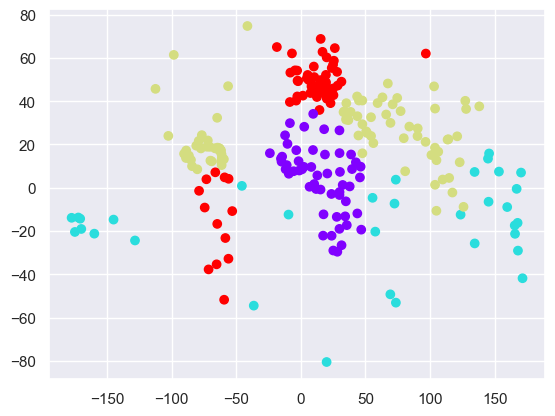

In [17]:
plt.scatter(data['Longitude'], data['Latitude'], c=identified_clusters, cmap='rainbow')

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.